## 데이터 전처리

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

In [3]:
np.column_stack(([1,2,3], [4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [4]:
fish_data = np.column_stack((fish_length, fish_weight))

In [5]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [6]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [7]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target ,random_state=42)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [11]:
print(kn.predict([[25, 150]]))

[0.]


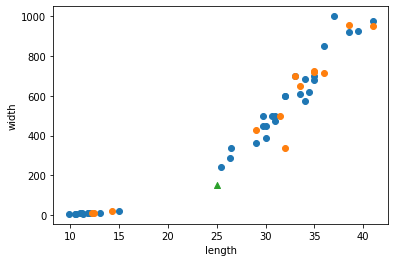

In [13]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.scatter(25, 150, marker="^")
plt.xlabel('length')
plt.ylabel('width')
plt.show()

In [14]:
distances, indexes = kn.kneighbors([[25,150]])

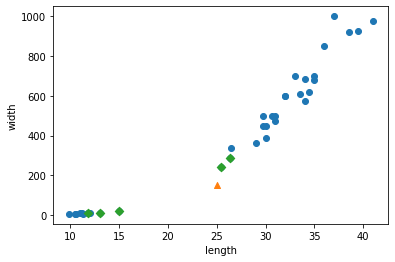

In [15]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker="^")
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker="D")
plt.xlabel('length')
plt.ylabel('width')
plt.show()

In [16]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 13.   12.2]
  [ 26.3 290. ]
  [ 11.8  10. ]]]


In [17]:
print(train_target[indexes])

[[1. 0. 0. 1. 0.]]


In [18]:
print(distances)

[[ 92.00086956 130.48375378 138.32150953 140.00603558 140.62090883]]


In [19]:
# x축의 범위는 좁고, y 축의 범위는 넓기 때문에 y축으로 조금만 멀어져도 거리가 상당히 멀게 된다.
# 두 특성의 스케일을 같게 만들어야 한다. 특성값을 일정한 기준으로 맞춰 주는 것을 데이터 전처리라 한다.
# 표준점수(standard score)로 처리(z점수)
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [20]:
print(mean,std)

[ 26.175      418.08888889] [ 10.21073441 321.67847023]


In [21]:
train_scaled = (train_input - mean) / std

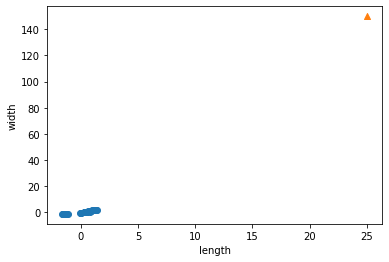

In [22]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker="^")
plt.xlabel('length')
plt.ylabel('width')
plt.show()

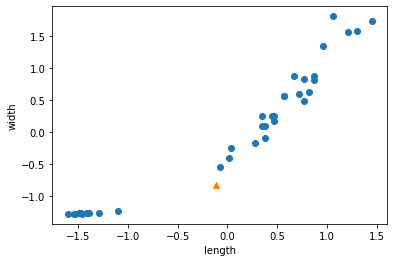

In [23]:
new = ([25,150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0],new[1], marker="^")
plt.xlabel('length')
plt.ylabel('width')
plt.show()

In [25]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [26]:
test_scaled = (test_input - mean) / std

In [27]:
kn.score(test_scaled, test_target)

1.0

In [29]:
print(kn.predict([new]))

[1.]


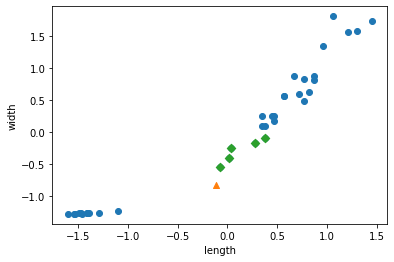

In [30]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0],new[1], marker="^")
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker="D")
plt.xlabel('length')
plt.ylabel('width')
plt.show()

## 마무리
- 데이터 전처리: 머신러닝 모델에 훈련 데이터를 주입하기 전에 가공하는 단계
- 표준점수: 훈련 세트의 스케일을 바꾸는 대표적인 방법 중 하나. 특성의 평균을 빼고 표준편차로 나눈다. 반드시 훈련 세트의 평균과 표준편차로 테스트 세트를 바꿔야 한다.
- 브로드캐스팅: 크기가 다른 넘파이 배열에서 자동으로 사칙 연산을 모든 행이나 열로 확장하여 수행하는 기능
- scikit-learn
  - train_test_split() 
    - 훈련 데이터를 훈련 세트와 테스트 세트로 나누는 함수. 
    - 여러 개의 배열을 전달할 수 있다. test_size 매개변수에서 테스트 세트로 나눌 비율을 정할 수 있다.
  - kneighbors()
    - KNN 객체의 메서드. 
    - 입력한 데이터에 가장 가까운 이웃을 찾아 거리와 이웃 샘플의 인덱스를 반환. 
    - 기본적으로 이웃의 개수는 KNeighborsClassifier 클래스의 객체를 생성할 때 지정한 개수를 사용한다. 하지만 n_neighbors 매개변수에서 다르게 지정할 수도 있다. 
    - return_distance 매개변수를 False로 지정하면 이웃 샘플의 인덱스만 반환하고 거리는 반환하지 않는다. 기본값은 True이다.